Importing libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Step 1: Reading and Understanding the Data

In [ ]:
# Load the dataset for bike-sharing problem
bike = pd.read_csv('day.csv')

Saving day.csv to day.csv


In [5]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Check the shape of the data
bike.shape

(730, 16)

In [7]:
# Check the info about the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Check the summary of the data
bike.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


**Insight**

Dataset has 730 rows and 16 columns

*   Except one column, all others are float or integer.
*   One column ('dteday') is of object type.
*   Few columns are categorical and have integer data type. Categorical       features like 'season', 'weathersit' and 'weekday' have numeric value like 1,2,3...We will encode them for better readability and suitable for regression model.
*   Categorical features ('holiday', 'workingday') are already labeled as 0 and 1 - do not need further encoding.
*   Column instant is only an index value

In [9]:
# Check for the null values in column data
bike.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

**Insight**

*   There are no missing / Null values either in columns or rows.
*   The shape after running the drop duplicate command is same as the original dataframe.

**Drop unnessasary variables**

*   instant - as it's index variale, so it doesn't make any siginficance for model, so we'll drop this column.
*   dteday - year ,month and weekday as separate columns, so we'll drop this column.
*   casual + registered = cnt, we'll consider to drop both casual & registered columns. The problem statement states that model should be built taking 'cnt' as the target variable.

Note - using bike_dup dataframe and keeping bike dataframe intact.

In [11]:
# Add unnecessary columns to a list
unnecessary_columns =['instant','dteday','casual','registered']

In [12]:
# Drop unnecessary columns
bike_dup.drop(unnecessary_columns,axis=1,inplace=True)

In [13]:
# Check the data after dropping the columns
bike_dup.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Check the info of bike dataframe after dropping columns
bike_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
# Convert to categorical datatype
category=['season','mnth','weekday','weathersit','yr']
bike_dup[category]=bike_dup[category].astype('category')

In [16]:
# Check datatype
bike_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


In [17]:
# Map the numeric values to their categorical values for weekday, mnth and season columns
#Checked from calendar 01.01.2018 was a Monday
name_dict = {"season" : {1:"spring", 2:"summer", 3:"fall", 4:"winter"},
             "weathersit" : {1: "Clear/Partly Cloudy", 2: "Mist and Cloudy", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain"},
             "weekday" : {0: "Tuesday", 1:"Wednesday", 2:"Thursday", 3:"Friday", 4:"Saturday", 5:"Sunday", 6:"Monday"},
             "mnth": {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'},
             "yr": {0: 2018, 1: 2019}}

for column in name_dict.keys():
    bike_dup[column] = bike_dup[column].apply(lambda x : name_dict[column][x])

bike_dup.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Monday,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Tuesday,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Wednesday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Thursday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Friday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

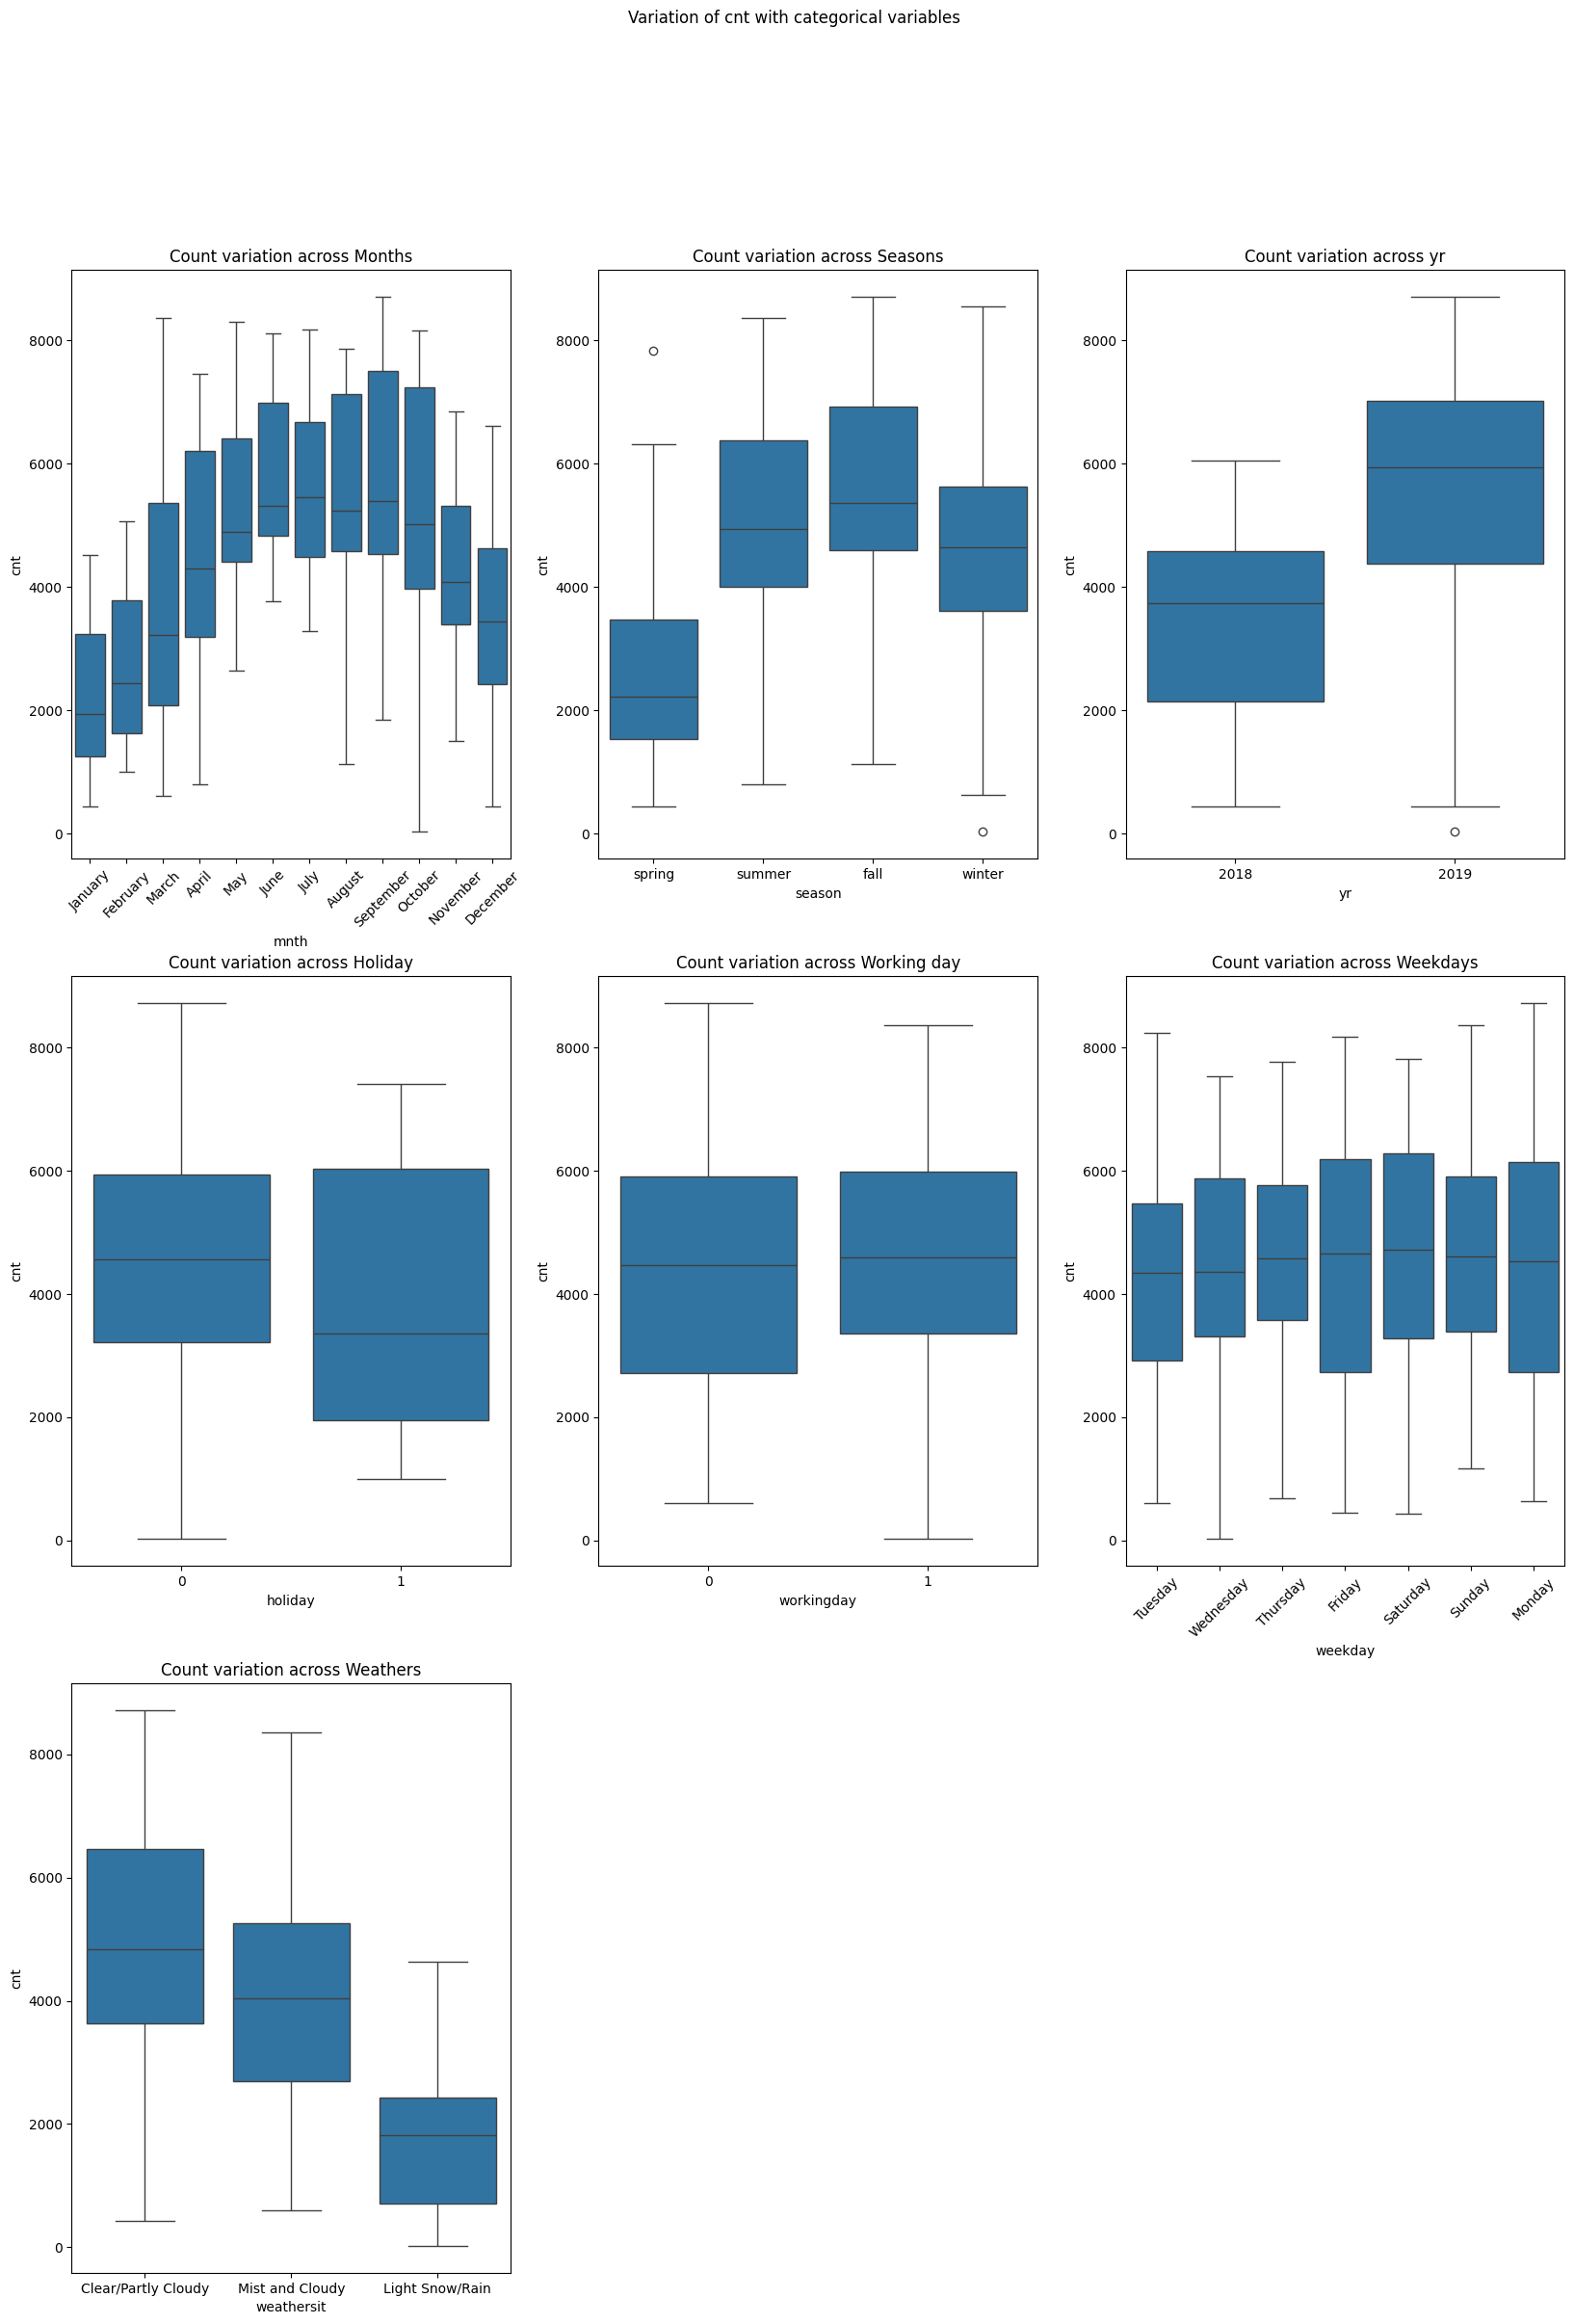

In [18]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=[20,27])
plt.suptitle("Variation of cnt with categorical variables")
plt.subplot(3,3,1)
sns.boxplot(data=bike_dup,x='mnth',y='cnt')
plt.xticks(rotation=45)
plt.title("Count variation across Months")
plt.subplot(3,3,2)
sns.boxplot(data=bike_dup,x='season',y='cnt')
plt.title("Count variation across Seasons")
plt.subplot(3,3,3)
plt.title("Count variation across yr")
sns.boxplot(data=bike_dup,x='yr',y='cnt')
plt.subplot(3,3,4)
sns.boxplot(data=bike_dup,x='holiday',y='cnt')
plt.title("Count variation across Holiday")
plt.subplot(3,3,5)
sns.boxplot(data=bike_dup,x='workingday',y='cnt')
plt.title("Count variation across Working day")
plt.subplot(3,3,6)
sns.boxplot(data=bike_dup,x='weekday',y='cnt')
plt.xticks(rotation=45)
plt.title("Count variation across Weekdays")
plt.subplot(3,3,7)
sns.boxplot(data=bike_dup,x='weathersit',y='cnt')
plt.title("Count variation across Weathers")
plt.show()

**Insight**

*  Count has increased significantly in 2019 compared to 2018.
*  Count is higher during May to October months.
*  Demand for bike rental is significantly lower in the spring season compared to other seasons.
*  No records found for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather.
*  For weekdays, the median is almost similar for all days.

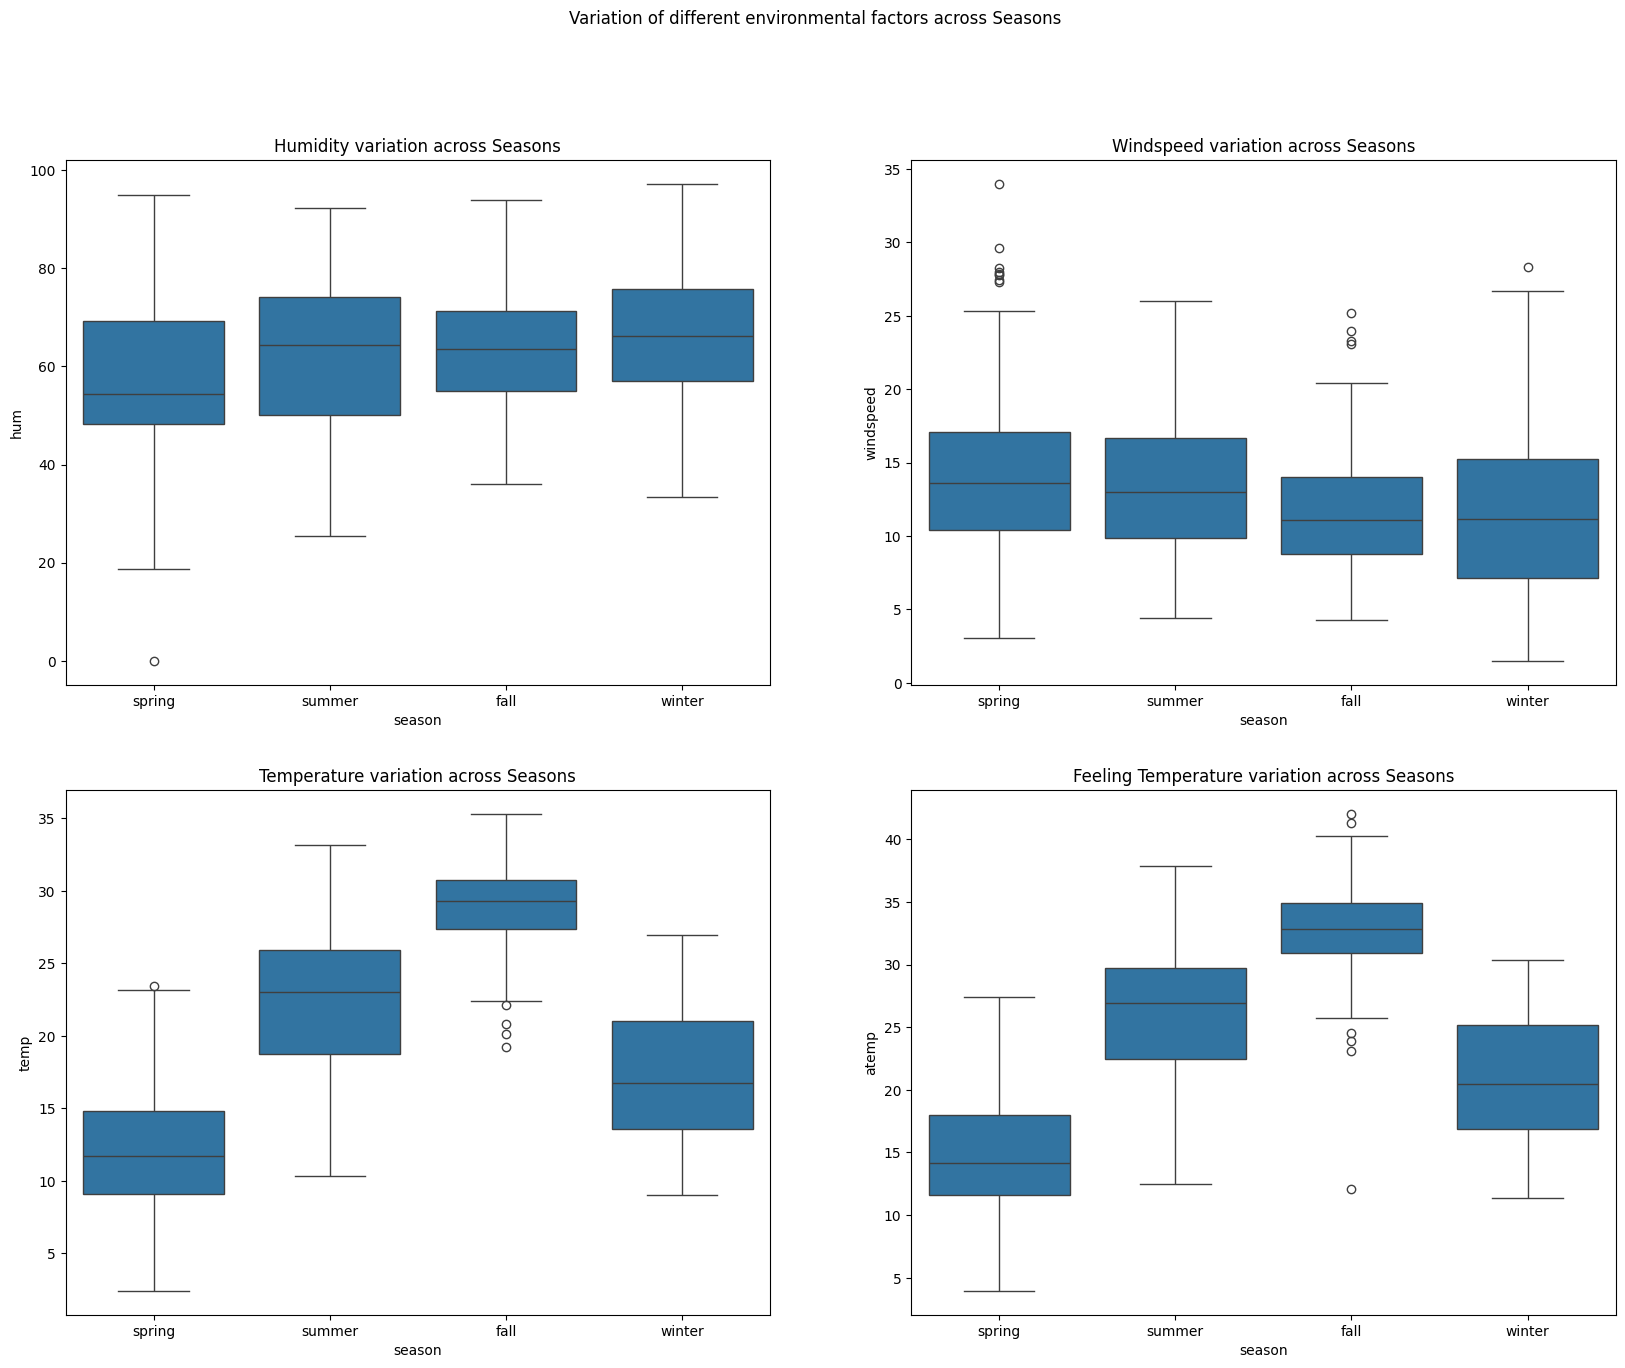

In [19]:
# Analysing distribution of values for numeric columns with season
plt.figure(figsize=[20,15])
plt.suptitle("Variation of different environmental factors across Seasons")
plt.subplot(2,2,1)
sns.boxplot(data=bike_dup,x='season',y='hum')
plt.title("Humidity variation across Seasons")
plt.subplot(2,2,2)
sns.boxplot(data=bike_dup,x='season',y='windspeed')
plt.title("Windspeed variation across Seasons")
plt.subplot(2,2,3)
sns.boxplot(data=bike_dup,x='season',y='temp')
plt.title("Temperature variation across Seasons")
plt.subplot(2,2,4)
sns.boxplot(data=bike_dup,x='season',y='atemp')
plt.title("Feeling Temperature variation across Seasons")
plt.show()

**Insight**

*  Humidity has an outlier at 0, which seems like impossible on earth.Also evident from describe() with minimum value of 0.

In [20]:
# Checking the number of records where humidity is zero as its practically impossible and needs to be imputed
bike_dup[bike_dup['hum']==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
68,spring,2018,March,0,Saturday,1,Light Snow/Rain,15.952731,19.2834,0.0,17.545759,623


In [21]:
# calculate the mean value for 'hum' column only for spring season
mean_hum_spring = bike_dup[bike_dup['season'] == 'spring']['hum'].mean()

# Replacing the zero humidity value with the mean value for spring season
bike_dup.loc[(bike_dup['season']=="spring")&(bike_dup['hum']==0),'hum']=mean_hum_spring

In [22]:
# Checking the rows with humidity after replacement
bike_dup[bike_dup['hum']==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [23]:
# Adding numeric columns to a list for visualisation purpose
numeric_Col=['temp','atemp','hum','windspeed','cnt']

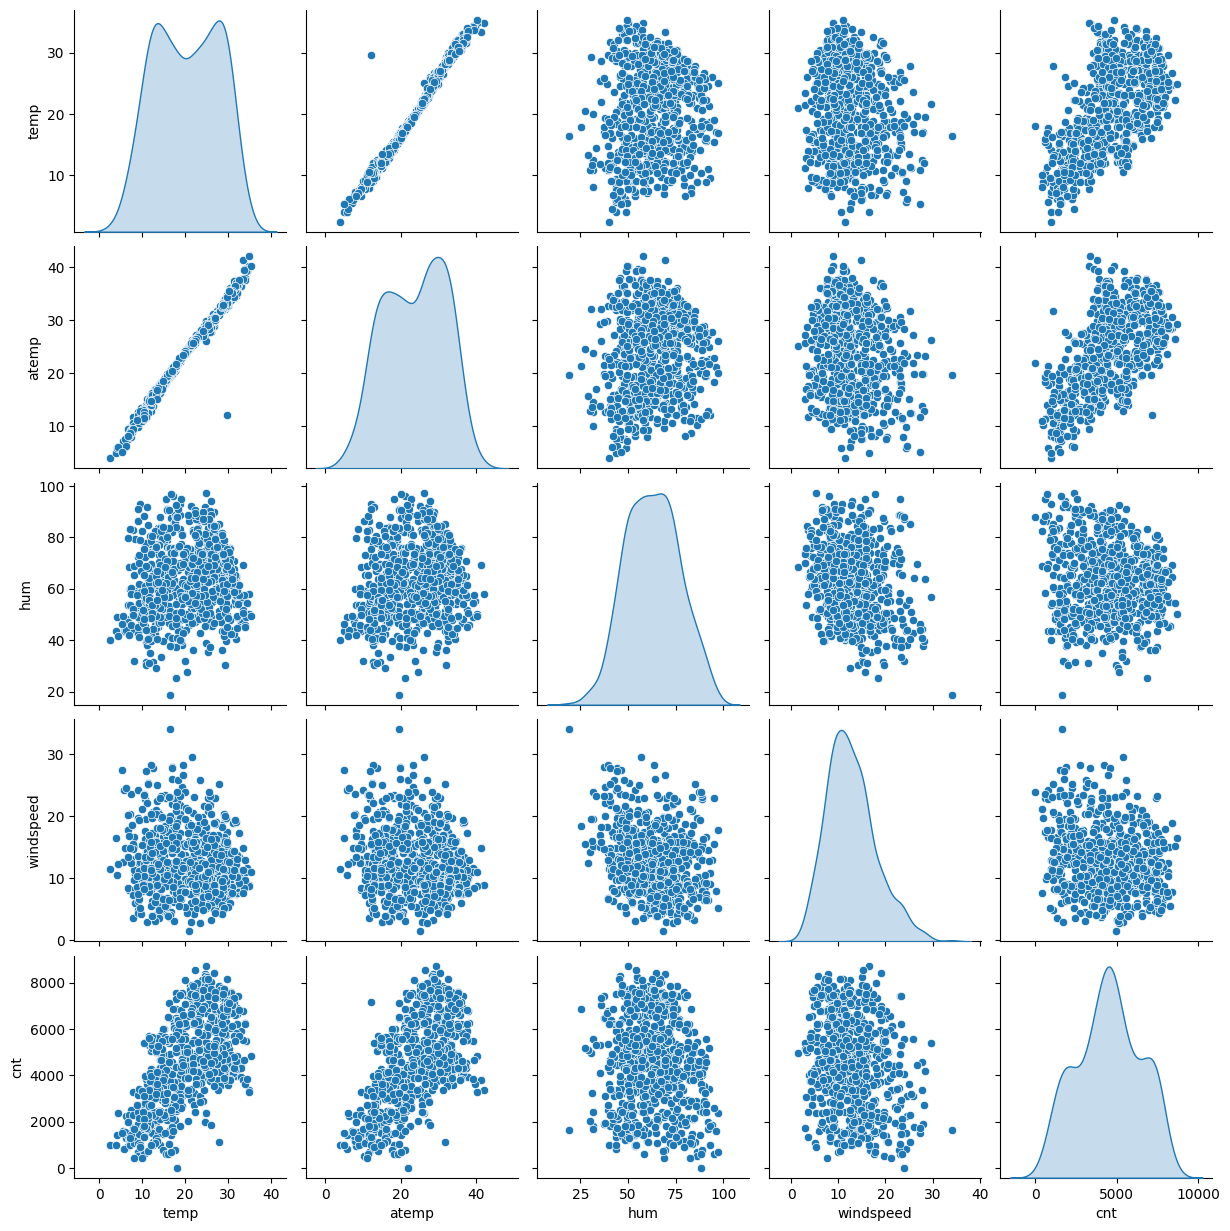

In [24]:
# Creating pairplots to see the relation between numeric variables
sns.pairplot(bike_dup[numeric_Col],diag_kind='kde')
plt.show()

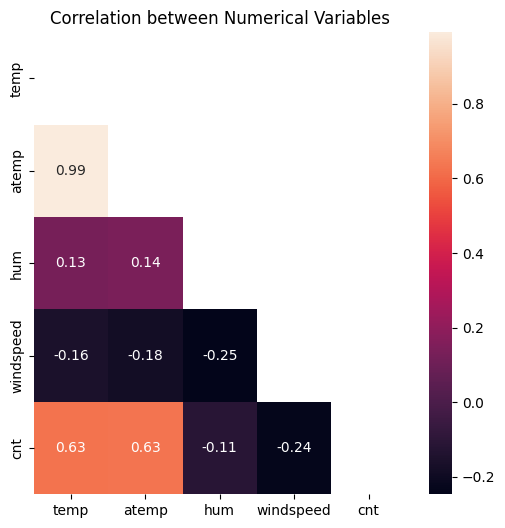

In [25]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(bike_dup[numeric_Col].corr())
sns.heatmap(bike_dup[numeric_Col].corr(), annot = True, mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

**Insight**

*  There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity.

In [26]:
# Dropping 'atemp' as it has very high correlation with temp
bike_dup.drop('atemp',axis=1,inplace=True)

In [27]:
# Checking information
bike_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 39.1 KB


## Step 3: Data Preparation

In [28]:
# Taking into a new dataframe
bike_new = bike_dup.copy()

In [29]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,January,0,Monday,0,Mist and Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,January,0,Tuesday,0,Mist and Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,January,0,Wednesday,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,January,0,Thursday,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,January,0,Friday,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


In [30]:
bike_new.shape

(730, 11)

In [31]:
# Encoding 'yr' column back to its previous state
bike_new['yr'] = bike_new['yr'].map({2018: 0, 2019: 1}).astype('int64')

In [32]:
# Rechecking 'yr' column after conversion
bike_new['yr'].head()

,yr
0,0
1,0
2,0
3,0
4,0


In [33]:
# Adding variables to a list to create dummy variables
dummy=['season','mnth','weekday','weathersit']

In [34]:
# Creating Dummy Variables, dytpe 'int' is necessary for integer value
bike_dummy=pd.get_dummies(bike_new[dummy],drop_first=True,dtype=int)

In [35]:
# checking the dataframe
bike_dummy.head()

,season_summer,season_fall,season_winter,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,...,mnth_November,mnth_December,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weekday_Monday,weathersit_Mist and Cloudy,weathersit_Light Snow/Rain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
#Checking the information of dummy dataframe
bike_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   season_summer               730 non-null    int64
 1   season_fall                 730 non-null    int64
 2   season_winter               730 non-null    int64
 3   mnth_February               730 non-null    int64
 4   mnth_March                  730 non-null    int64
 5   mnth_April                  730 non-null    int64
 6   mnth_May                    730 non-null    int64
 7   mnth_June                   730 non-null    int64
 8   mnth_July                   730 non-null    int64
 9   mnth_August                 730 non-null    int64
 10  mnth_September              730 non-null    int64
 11  mnth_October                730 non-null    int64
 12  mnth_November               730 non-null    int64
 13  mnth_December               730 non-null    int64
 14  weekday_We

In [37]:
#Concating the dataframe with dummy variables with the original dataframe to get all the variables together
bike_new=pd.concat([bike_new,bike_dummy],axis=1)

In [38]:
#checking shape of the dataframe
bike_new.shape

(730, 33)

In [39]:
# Dropping columns 'mnth','weathersit','season' and 'weekday' as we created dummy variables for them.
bike_new.drop(dummy,axis=1,inplace=True)

In [40]:
#checking shape of the dataframe
bike_new.shape

(730, 29)

In [41]:
# Checking the info of dataframe
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_summer               730 non-null    int64  
 8   season_fall                 730 non-null    int64  
 9   season_winter               730 non-null    int64  
 10  mnth_February               730 non-null    int64  
 11  mnth_March                  730 non-null    int64  
 12  mnth_April                  730 non-null    int64  
 13  mnth_May                    730 non

In [42]:
bike_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_November,mnth_December,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weekday_Monday,weathersit_Mist and Cloudy,weathersit_Light Snow/Rain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Insight**
*  If you notice, previously it was mentioned that there is no data for the weather situation - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather. Therefore, no dummy column was created for the same.

## Step 4: Splitting the Data into Training and Testing Sets

In [43]:
# Splitting the data into train and test
np.random.seed(0)
bike_train,bike_test=train_test_split(bike_new,train_size=0.7,test_size = 0.3,random_state=100)

In [44]:
# Checking the shape of training dataset
bike_train.shape

(510, 29)

In [45]:
# Checking the shape of test dataset
bike_test.shape

(219, 29)

In [46]:
# Checking infor of the train dataset
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   hum                         510 non-null    float64
 5   windspeed                   510 non-null    float64
 6   cnt                         510 non-null    int64  
 7   season_summer               510 non-null    int64  
 8   season_fall                 510 non-null    int64  
 9   season_winter               510 non-null    int64  
 10  mnth_February               510 non-null    int64  
 11  mnth_March                  510 non-null    int64  
 12  mnth_April                  510 non-null    int64  
 13  mnth_May                    510 non-nul

In [47]:
# Apply scale() to all the columns except the 'yes-no' and 'dummy' variables, mainly numerical columns
scale=MinMaxScaler()
scaling=['temp','hum','windspeed','cnt']
bike_train[scaling]=scale.fit_transform(bike_train[scaling])

In [48]:
# Checking the normalized train data
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_November,mnth_December,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weekday_Monday,weathersit_Mist and Cloudy,weathersit_Light Snow/Rain
653,1,0,1,0.509887,0.473375,0.300794,0.864243,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.659744,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.553780,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.377528,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.385516,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [49]:
# Checking the summary of the normalized train data
# min for all columns is 0.0 and max for all columns is 1.0
bike_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.567863,0.177364,0.0,0.428913,0.570553,0.695953,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
season_summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
season_fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
season_winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


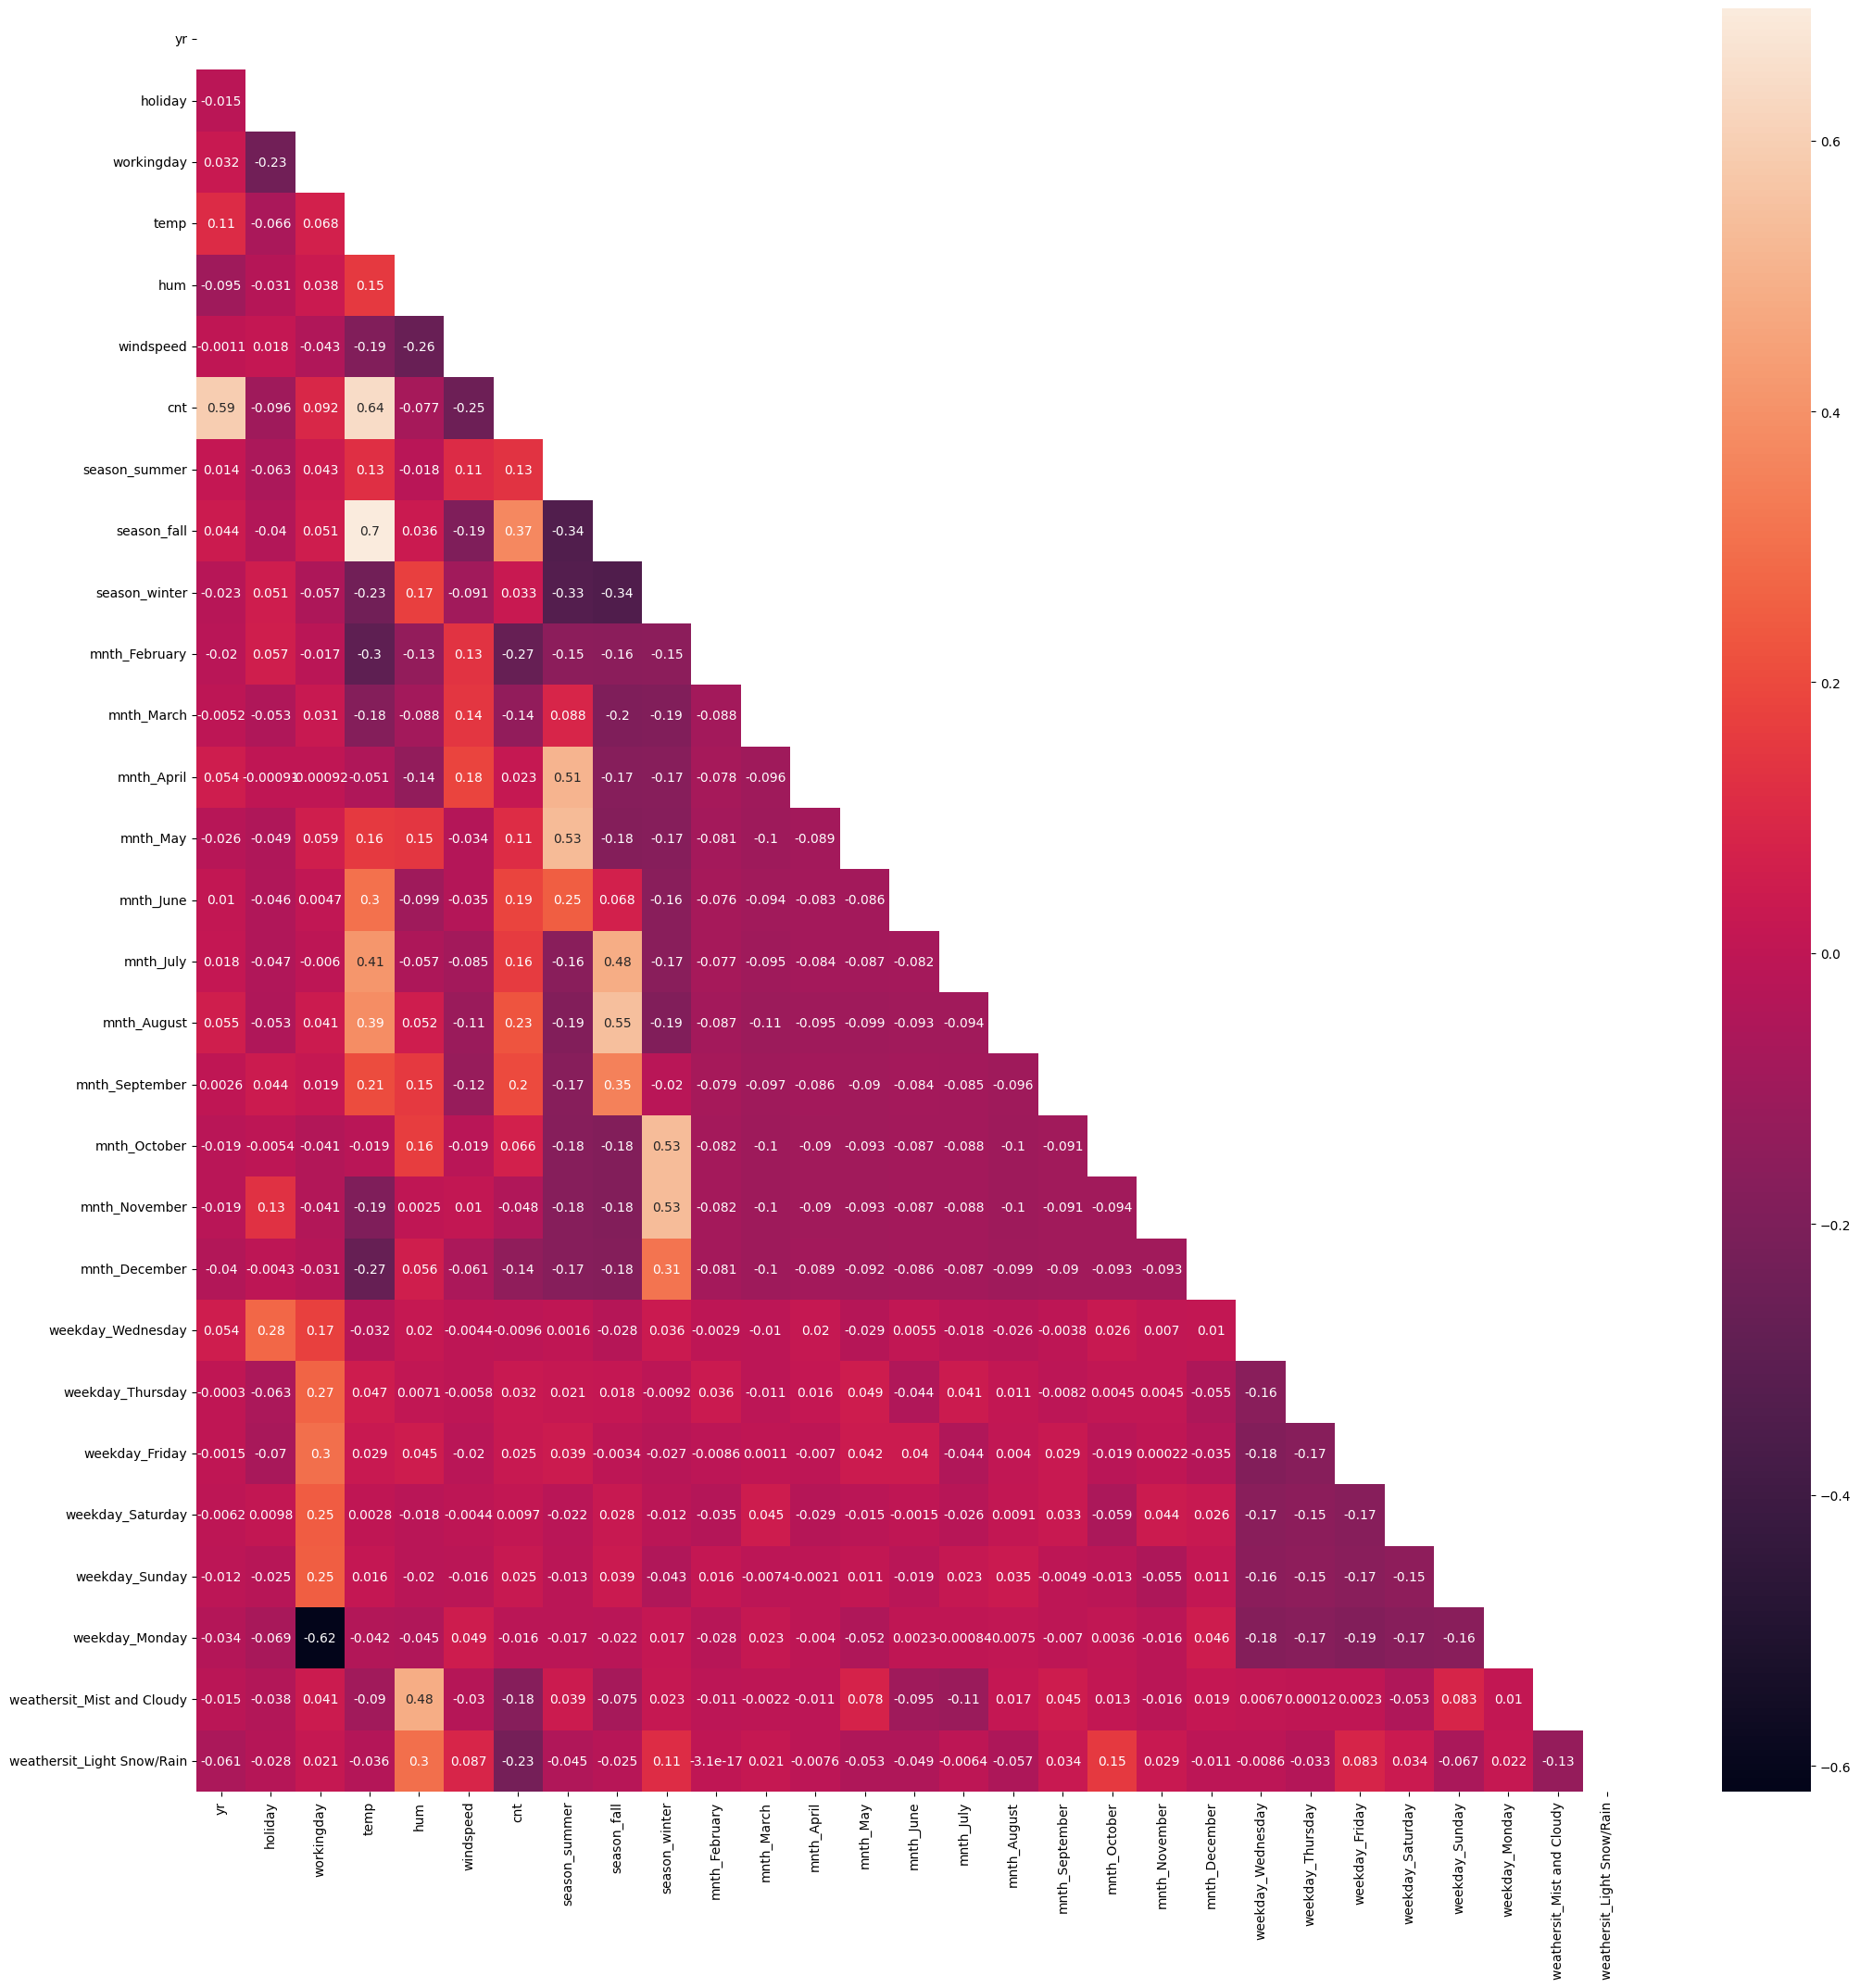

In [50]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(bike_train.corr())
sns.heatmap(bike_train.corr(), annot = True, mask=matrix)
plt.show()

**Insight**

*  'cnt' seems to have high correlation with 'yr' and 'temp' columns
*  windspeed: This shows a negative correlation of about -0.25, implying that higher wind speeds are associated with fewer bike rentals.

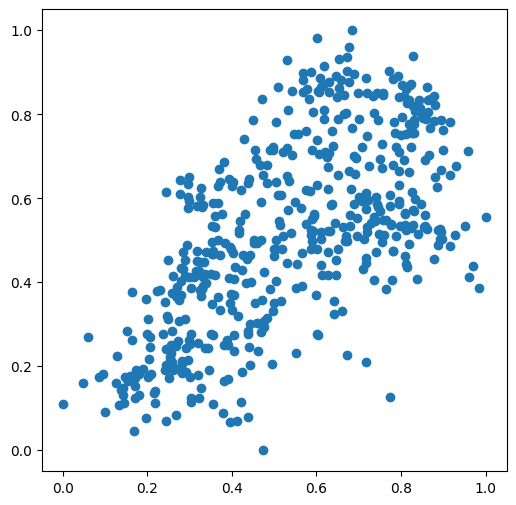

In [51]:
# Visualizing correlation between 'temp' and 'cnt' to see the trends via Scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

### Step 5: Building the Linear Model

In [52]:
# Dividing training dataset into x n y variables
y_train = bike_train.pop('cnt')
X_train = bike_train

In [53]:
# Checking the y variable
y_train.head()

,cnt
653,0.864243
576,0.827658
426,0.465255
728,0.204096
482,0.482973


In [54]:
# Checking the X variable
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_February,...,mnth_November,mnth_December,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weekday_Monday,weathersit_Mist and Cloudy,weathersit_Light Snow/Rain
653,1,0,1,0.509887,0.473375,0.300794,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.659744,0.264686,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.553780,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.377528,0.663106,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.385516,0.188475,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


**RFE**

Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [55]:
# Recursive feature elimination
lr = LinearRegression()
rfe=RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Create a list of tuples with column name, support, and ranking
# Sort the list: selected features (support=True) first, then by ascending rank
# Print the sorted list
rfe_ranking = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
rfe_ranking.sort(key=lambda x: (not x[1], x[2]))
display(rfe_ranking)

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_fall', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_August', np.True_, np.int64(1)),
 ('mnth_September', np.True_, np.int64(1)),
 ('mnth_October', np.True_, np.int64(1)),
 ('weekday_Monday', np.True_, np.int64(1)),
 ('weathersit_Mist and Cloudy', np.True_, np.int64(1)),
 ('weathersit_Light Snow/Rain', np.True_, np.int64(1)),
 ('mnth_March', np.False_, np.int64(2)),
 ('mnth_May', np.False_, np.int64(3)),
 ('mnth_April', np.False_, np.int64(4)),
 ('mnth_June', np.False_, np.int64(5)),
 ('mnth_February', np.False_, np.int64(6)),
 ('mnth_July', np.False_, np.int64(7)),
 ('mnth_November', np.False_, np.int64(8)),
 ('mnth_December', np.False_, np.int64(9)),
 ('weekday_Wednesday', np.False_, np.int64

In [57]:
# getting the columns chosen by rfe
rfe_sel_col=X_train.columns[rfe.support_]

In [58]:
# Showing the columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_February', 'mnth_March', 'mnth_April', 'mnth_May', 'mnth_June',
       'mnth_July', 'mnth_November', 'mnth_December', 'weekday_Wednesday',
       'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday',
       'weekday_Sunday'],
      dtype='object')

In [59]:
# Creating the independent variable dataset using the columns selected by RFE method.
X_train_rfe=X_train[rfe_sel_col]

In [60]:
#Checking the shape of X_train_rfe
X_train_rfe.shape

(510, 15)

Model 1

In [61]:
# Adding constant value for the calculation of intercept and needs to be added explicitly for statsmodel.
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm1=sm.OLS(y_train,X_train_rfe_constn).fit()
# Checking the summary
display(lm1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.04e-191
Time:                        04:14:00   Log-Likelihood:                 520.01
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1674      0.024      6.872      0.000       0.120       0.215
yr                             0.2295      0.008     28.644      0.000       0.214       0.245
holiday                       -0.0548      0.027     -2.038      0.042      -0.108      -0.002
workingday                     0.0446      0.012      3.873      0.000       0.022       0.067
temp                           0.5003      0.034     14.817      0.000       0.434       0.567
hum                           -0.1387      0.032     -4.335      0.000      -0.202      -0.076
windspeed                     -0.1842      0.025     -7.232      0.000      -0.234      -0.134
season_summer                  0.1158      0.015      7.856      0.000       0.087       0.145
season_fall                    0.0266      0.022      1.209      0.227      -0.017       0.070
season_winter                  0.1421      0.013     10.625      0.000       0.116       0.168
mnth_August                    0.0480      0.017      2.775      0.006       0.014       0.082
mnth_September                 0.1183      0.017      6.915      0.000       0.085       0.152
mnth_October                   0.0435      0.017      2.524      0.012       0.010       0.077
weekday_Monday                 0.0528      0.015      3.637      0.000       0.024       0.081
weathersit_Mist and Cloudy    -0.0576      0.011     -5.426      0.000      -0.078      -0.037
weathersit_Light Snow/Rain    -0.2424      0.027     -8.935      0.000      -0.296      -0.189
==============================================================================
Omnibus:                       77.663   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.069
Skew:                          -0.753   Prob(JB):                     6.58e-46
Kurtosis:                       5.743   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Check the parameters obtained
lm1.params

,0
const,0.167387
yr,0.229505
holiday,-0.054766
workingday,0.044596
temp,0.500341
hum,-0.138676
windspeed,-0.184188
season_summer,0.115792
season_fall,0.026630
season_winter,0.142089


**Insight**
*  R-squared - 0.849, this indicates that approximately 84.9% of the variance in the 'cnt' (bike count) can be explained by the independent variables included in this model.
*  Adjusted R-squared - 0.844, this value is very close to the R-squared.
* P-values of individual coefficients - Mostly p-values are less than 0.05, however, holiday, workingday, season_fall, mnth_August and mnth_October have higher p-values, suggesting they might not be as statistically significant in the presence of other variables

Check Varince Inflation Factor

In [63]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False)

,features,vif
3,temp,23.75
4,hum,14.25
7,season_fall,8.26
2,workingday,4.82
5,windspeed,3.74
6,season_summer,3.45
8,season_winter,2.85
13,weathersit_Mist and Cloudy,2.35
0,yr,2.04
12,weekday_Monday,1.85


**Insight**
* Dropping variable season_fall.
* season_fall has a VIF of 8.26, which is high, indicating significant multicollinearity.
Additionally, its p-value is slightly higher, suggesting it might be not statistically significant in this model

In [64]:
# Dropping season_fall
X_train_rfe.drop('season_fall',axis=1,inplace=True)

In [65]:
# Checking the columns after removal
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_August', 'mnth_September',
       'mnth_October', 'weekday_Monday', 'weathersit_Mist and Cloudy',
       'weathersit_Light Snow/Rain'],
      dtype='object')

Model 2

In [66]:
# Adding constant value for the calculation of intercept and needs to be added explicitly for statsmodel.
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm2=sm.OLS(y_train,X_train_rfe_constn).fit()
# Checking the summary
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.94e-192
Time:                        04:17:15   Log-Likelihood:                 519.26
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     495   BIC:                            -945.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [67]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False)

,features,vif
4,hum,13.42
3,temp,9.55
2,workingday,4.82
5,windspeed,3.65
12,weathersit_Mist and Cloudy,2.32
7,season_winter,2.24
0,yr,2.02
11,weekday_Monday,1.85
6,season_summer,1.83
10,mnth_October,1.62


**Insight**
*  Feature 'hum' has the highest VIF, indicating significant multicollinearity, hence dropping this field.

In [68]:
# Dropping hum
X_train_rfe.drop('hum',axis=1,inplace=True)

In [69]:
# Checking the columns after removal
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_August', 'mnth_September', 'mnth_October',
       'weekday_Monday', 'weathersit_Mist and Cloudy',
       'weathersit_Light Snow/Rain'],
      dtype='object')

Model 3

In [70]:
# Adding constant value for the calculation of intercept and needs to be added explicitly for statsmodel.
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm3=sm.OLS(y_train,X_train_rfe_constn).fit()
# Checking the summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          6.16e-189
Time:                        04:19:17   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [71]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False)

,features,vif
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_winter,2.02
5,season_summer,1.82
10,weekday_Monday,1.77
9,mnth_October,1.62
7,mnth_August,1.59
11,weathersit_Mist and Cloudy,1.54


Insight

*  Feature 'holiday' has the highest p-value, indicating it might not be statistically significant in this model, hence dropping this field.

Model 4

In [72]:
# Dropping temp
X_train_rfe.drop('holiday',axis=1,inplace=True)

In [73]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_August', 'mnth_September', 'mnth_October',
       'weekday_Monday', 'weathersit_Mist and Cloudy',
       'weathersit_Light Snow/Rain'],
      dtype='object')

In [74]:
# Adding constant value for the calculation of intercept and needs to be added explicitly for statsmodel.
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm4=sm.OLS(y_train,X_train_rfe_constn).fit()
# Checking the summary
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.86e-189
Time:                        04:23:09   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [75]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False)

,features,vif
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,season_winter,1.99
4,season_summer,1.82
9,weekday_Monday,1.70
8,mnth_October,1.61
6,mnth_August,1.59
10,weathersit_Mist and Cloudy,1.54


**Insight**
*  Dropping mnth_October for this high p-value

Model 5

In [76]:
# Dropping mnth_October
X_train_rfe.drop('mnth_October',axis=1,inplace=True)

In [77]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_August', 'mnth_September', 'weekday_Monday',
       'weathersit_Mist and Cloudy', 'weathersit_Light Snow/Rain'],
      dtype='object')

In [78]:
# Adding constant value for the calculation of intercept and needs to be added explicitly for statsmodel.
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm5=sm.OLS(y_train,X_train_rfe_constn).fit()
# Checking the summary
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.00e-189
Time:                        04:25:05   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [79]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False)

,features,vif
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_summer,1.81
8,weekday_Monday,1.69
6,mnth_August,1.58
9,weathersit_Mist and Cloudy,1.54
5,season_winter,1.51
7,mnth_September,1.30


**Insight**

*  Dropping mnth_August for this high p-value

In [80]:
# Dropping mnth_August
X_train_rfe.drop('mnth_August',axis=1,inplace=True)

In [81]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_September', 'weekday_Monday',
       'weathersit_Mist and Cloudy', 'weathersit_Light Snow/Rain'],
      dtype='object')

Model 6

In [82]:
# Adding constant value for the calculation of intercept and needs to be added explicitly for statsmodel.
X_train_rfe_constn=sm.add_constant(X_train_rfe)
lm6=sm.OLS(y_train,X_train_rfe_constn).fit()
# Checking the summary
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.47e-188
Time:                        04:28:05   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [83]:
# Calculating vif
vif_df=pd.DataFrame()
vif_df['features']=X_train_rfe.columns
vif_df['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif_df['vif']=round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False)

,features,vif
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_Monday,1.69
4,season_summer,1.57
8,weathersit_Mist and Cloudy,1.53
5,season_winter,1.40
6,mnth_September,1.20
9,weathersit_Light Snow/Rain,1.08


In [92]:
#columns from training data for lm6 model
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_September', 'weekday_Monday',
       'weathersit_Mist and Cloudy', 'weathersit_Light Snow/Rain'],
      dtype='object')

**Insight**
*  From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

In [84]:
print(lm6.params)

const                         0.075325
yr                            0.233056
workingday                    0.056323
temp                          0.549936
windspeed                    -0.155238
season_summer                 0.087429
season_winter                 0.131826
mnth_September                0.097236
weekday_Monday                0.067688
weathersit_Mist and Cloudy   -0.081347
weathersit_Light Snow/Rain   -0.288021
dtype: float64


Insight

*  There is no variable which has high p-value
*  VIFs for all variables is less than 5
*  Did not drop temp variable as it was always statistically significant.
*  This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Hypothesis Testing:
Hypothesis testing states that:

*  H0:B1=B2=...=Bn=0, this implies that none of the independent variables (predictors) have a statistically significant linear relationship with the dependent variable (cnt) in the model.

*  H1: at least one Bi!=0, this implies that at least one of the independent variables has a statistically significant linear relationship with the dependent variable.

**Insight**

Based on the lm6 model summary, specifically looking at the F-statistic and its associated p-value:

*F-statistic: 254.0*
*Prob (F-statistic): 1.47e-188*

*  Since the p-value for the F-statistic (1.47e-188) is exceedingly small (much, much less than the conventional significance level of 0.05), we **reject the null hypothesis**.

*  This means that the model as a whole is statistically significant, and at least one of the independent variables in lm6 has a significant linear relationship with the target variable cnt (bike count). In other words, the model is useful in explaining the variation in bike rentals.

*  In lm6, if we look at the summary, we'll see that the p-values for all the included coefficients are very low (less than 0.05). This means that for each individual variable in lm6, we can reject its individual null hypothesis that its coefficient is zero. Therefore, all the variables remaining in lm6 are considered statistically significant predictors of bike count.

**The equation of best fitted surface based on model lm6:**

cnt = 0.075325 + (yr * 0.233056) + (workingday * 0.056323) + (temp * 0.549936) - (windspeed * 0.155238) + (season_summer * 0.087429) + (season_winter * 0.131826) + (mnth_September * 0.097236) + (weekday_Monday * 0.067688) - (weathersit_Mist and Cloudy * 0.081347) - (weathersit_Light Snow/Rain * 0.288021)

Where:

*  cnt is the predicted bike count.
*  yr is the year (0 for 2018, 1 for 2019).
*  workingday is a binary indicator (0 or 1).
*  temp is the normalized temperature.
*  windspeed is the normalized windspeed.
*  season_summer is a binary indicator for summer season.
*  season_winter is a binary indicator for winter season.
*  mnth_September is a binary indicator for September.
*  weekday_Monday is a binary indicator for Monday.
*  weathersit_Mist and Cloudy is a binary indicator for mist/cloudy weather.
*  weathersit_Light Snow/Rain is a binary indicator for light snow/rain weather.

**Residual Analysis of Training Data**

In [85]:
y_train_pred = lm6.predict(X_train_rfe_constn)

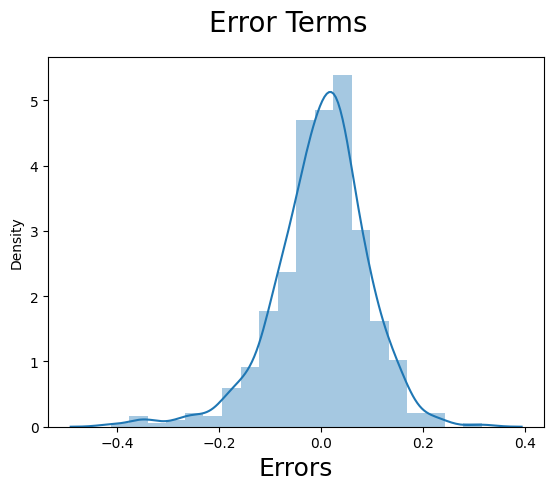

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**Insight**
*  From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## Step 6: Making Final Predictions using the Model

In [87]:
# Apply scale() to all the columns except the 'yes-no' and 'dummy' variables, mainly numerical columns on the test data set
scaling_test=['temp','hum','windspeed','cnt']
bike_test[scaling]=scale.transform(bike_test[scaling_test])

In [88]:
# Dividing test dataset into x n y variables
y_test = bike_test.pop('cnt')
X_test = bike_test

In [89]:
# Checking data of y_test dataframe
y_test.head()

,cnt
184,0.692706
535,0.712034
299,0.303382
221,0.547400
152,0.569029


In [90]:
# Checking data of X_test dataframe
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_February,...,mnth_November,mnth_December,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday,weekday_Monday,weathersit_Mist and Cloudy,weathersit_Light Snow/Rain
184,0,1,0,0.831783,0.575080,0.084219,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.516506,0.153728,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.798722,0.334206,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.301917,0.339570,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.149627,0.537414,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:

# Selecting the columns from the test set that were selected for the training set
X_test_top10 = X_test[X_train_rfe.columns]

In [94]:
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test_top10)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   windspeed                   219 non-null    float64
 5   season_summer               219 non-null    int64  
 6   season_winter               219 non-null    int64  
 7   mnth_September              219 non-null    int64  
 8   weekday_Monday              219 non-null    int64  
 9   weathersit_Mist and Cloudy  219 non-null    int64  
 10  weathersit_Light Snow/Rain  219 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 20.5 KB


In [95]:
# Making predictions using the final model (lm6)
y_pred = lm6.predict(X_test_lm6)

## Step 7: Model Evaluation

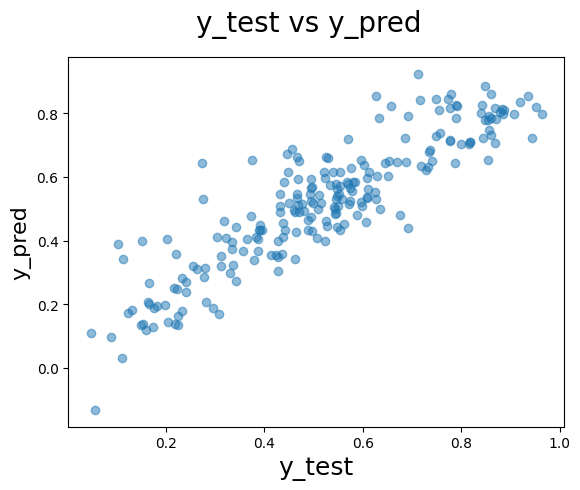

In [96]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [97]:
#(R-squared) on test data set
print(r2_score(y_test, y_pred))

0.7955844377237248


In [98]:
r2 = r2_score(y_test, y_pred)

In [99]:
#(Adjusted R-squared) on the test data set

# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

0.7654600390724842


Final results -

**Training Data (from lm6 summary):**

*  R-squared: 0.836
*  Adjusted R-squared: 0.832

**Test Data:**

*  R-squared: 0.7956
*  Adjusted R-squared: 0.7655

The linear regression model (lm6) demonstrates strong predictive power on the training data and maintains a good level of performance on the test data.